In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv('/Machine_Learning_Data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [31]:
# creditcard 부정거래 탐지

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [33]:
df.drop('Time', axis = 1, inplace = True)

In [34]:
# x data, y data divide

y = df['Class']
x = df.drop('Class', axis = 1)

In [37]:
# train data, test data split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=111)

In [38]:
# logisticregression으로 학습시키기

from sklearn.linear_model import LogisticRegression

log = LogisticRegression()



LogisticRegression()

In [45]:
# algorithm train

log.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# classification 예측, 평가 : classification_report, auc 값

In [54]:
preds = log.predict(x_test)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85290
           1       0.84      0.65      0.74       153

    accuracy                           1.00     85443
   macro avg       0.92      0.83      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [58]:
log.predict_proba(x_test)[:, 1]

array([2.67882518e-03, 2.96872428e-04, 1.15100235e-04, ...,
       9.47471082e-05, 1.54390106e-03, 3.47146229e-04])

In [59]:
roc_auc_score(y_test, log.predict_proba(x_test)[:, 1] )

0.9693729275819445

In [60]:
# LGBMClassifier를 통한 예측

In [61]:
from lightgbm import LGBMClassifier

In [62]:
lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train)

preds_lgbm = lgbm.predict(x_test)
preds_lgbm

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
lgbm.predict_proba(x_test)[:, 1]

array([0.00000000e+000, 1.23655133e-143, 1.15507019e-006, ...,
       1.35047689e-006, 6.38763981e-005, 3.92221780e-007])

In [66]:
roc_auc_score(y_test, lgbm.predict_proba(x_test)[:, 1])

0.799150380439822

In [67]:
# randomforest

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [72]:
preds_rfc = rfc.predict(x_test)

In [73]:
print(classification_report(y_test, preds_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85290
           1       0.92      0.83      0.87       153

    accuracy                           1.00     85443
   macro avg       0.96      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



In [74]:
rfc.predict_proba(x_test)[:, 1]

array([0., 0., 0., ..., 0., 0., 0.])

In [75]:
roc_auc_score(y_test, rfc.predict_proba(x_test)[:, 1])

0.9628897793533328

In [77]:
# scaling (Standard Scaler)

In [78]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()
scaler

StandardScaler()

In [82]:
scaler.fit(x_train)

StandardScaler()

In [86]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [88]:
# scaling한 데이터를 기반으로 위의 세 모델을 생성하고 평가하시오

In [90]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

In [92]:
log = LogisticRegression()
lgbm = LGBMClassifier()
rfc = RandomForestClassifier()

log.fit(x_train_scaled, y_train)
lgbm.fit(x_train_scaled, y_train)
rfc.fit(x_train_scaled, y_train)

preds_log = log.predict(x_test_scaled)
preds_lgbm = log.predict(x_test_scaled)
preds_rfc = log.predict(x_test_scaled)

pro_log = log.predict_proba(x_test_scaled)
pro_lgbm = log.predict_proba(x_test_scaled)
pro_rfc = log.predict_proba(x_test_scaled)

In [93]:
print('log_f1 :', f1_score(y_test, preds_log))
print('lgbm_f1 :', f1_score(y_test, preds_lgbm))
print('rfc_f1 :', f1_score(y_test, preds_rfc))

log_f1 : 0.7364620938628158
lgbm_f1 : 0.7364620938628158
rfc_f1 : 0.7364620938628158


In [95]:
print('log_auc_score :', roc_auc_score(y_test, pro_log[:, 1]))
print('lgbm_auc_score :', roc_auc_score(y_test, pro_lgbm[:, 1]))
print('rfc_auc_score :', roc_auc_score(y_test, pro_rfc[:, 1]))

log_auc_score : 0.9921590850746052
lgbm_auc_score : 0.9921590850746052
rfc_auc_score : 0.9921590850746052


In [97]:
# 이상치(outlier) 제거

In [ ]:
pd.DataFrame(x_train_scaled).plot(kind = 'bar')

<AxesSubplot:>

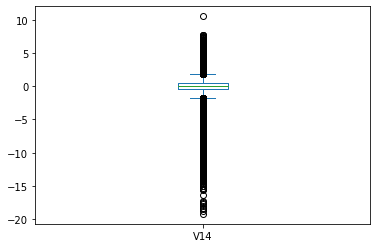

In [127]:
df['V14'].plot(kind ='box')

In [128]:
qu25 = np.percentile(df['V14'].values, 25)
qu75 = np.percentile(df['V14'].values, 75)
iqr = qu75 - qu25
iqr

0.9187238616731425

In [129]:
low_limit = qu25 - iqr * 1.5
high_limit = qu75 + iqr * 1.5

In [130]:
df1 = df[(df['V14'] >= low_limit) & (df['V14'] <= high_limit)]

In [131]:
x_train_scaled_no = x_train_scaled[(x_train_scaled[:, 13] <= high_limit) &\
                                   (x_train_scaled[:, 13] >= low_limit)]
y_train_no = y_train[(x_train_scaled[:, 13] <= high_limit) &\
                                   (x_train_scaled[:, 13] >= low_limit)]

In [132]:
# 세 모델 평가 ~ f1_score, roc_auc_score를 계산

log = LogisticRegression()
lgbm = LGBMClassifier()
frc = RandomForestClassifier()

models = [log, lgbm, rfc]

for m in models:
    m.fit(x_train_scaled_no, y_train_no)
    preds = m.predict(x_test_scaled)
    proba = m.predict_proba(x_test_scaled)
    
    print(m.__class__.__name__)
    print('f1_score :', f1_score(y_test, preds))
    print('roc_auc_score :', roc_auc_score(y_test, proba[:, 1]))
    print('---------------------------------')

LogisticRegression
f1_score : 0.7705882352941177
roc_auc_score : 0.993446350283577
---------------------------------
LGBMClassifier
f1_score : 0.0
roc_auc_score : 0.4073729996160733
---------------------------------
RandomForestClassifier
f1_score : 0.5943775100401607
roc_auc_score : 0.9653891720443208
---------------------------------


In [133]:
# imbalanced dataset :smote

In [115]:
y_train_no.value_counts()

0    188157
1        49
Name: Class, dtype: int64

In [116]:
y_test.value_counts()

0    85290
1      153
Name: Class, dtype: int64

In [134]:
import imblearn

In [135]:
from imblearn.over_sampling import SMOTE

In [136]:
smote = SMOTE(random_state=111)
x_train_sm, y_train_sm = smote.fit_resample(x_train_scaled_no, y_train_no)

In [137]:
y_train_sm.value_counts()

0    188157
1    188157
Name: Class, dtype: int64

In [124]:
log = LogisticRegression()
lgbm = LGBMClassifier()
frc = RandomForestClassifier()

models = [log, lgbm, rfc]

for m in models:
    m.fit(x_train_scaled_no, y_train_no)
    preds = m.predict(x_test_scaled)
    proba = m.predict_proba(x_test_scaled)
    
    print(m.__class__.__name__)
    print('f1_score :', f1_score(y_test, preds))
    print('roc_auc_score :', roc_auc_score(y_test, proba[:, 1]))
    print('---------------------------------')

LogisticRegression
f1_score : 0.7705882352941177
roc_auc_score : 0.993446350283577
---------------------------------
LGBMClassifier
f1_score : 0.0
roc_auc_score : 0.4073729996160733
---------------------------------
RandomForestClassifier
f1_score : 0.5887096774193549
roc_auc_score : 0.955080475149375
---------------------------------
